# Argosim tutorial - Part 1

In this tutorial we will explore the `antenna_utils` module. This module is used to generate diverse radio arrays configurations, get the array's baselines, and compute the uv-sampling under different observation strategies including multi-frequency observations and source tracking.

In [2]:
# Import the argosim package
import argosim
help(argosim)

Help on package argosim:

NAME
    argosim - ARGOSIM.

PACKAGE CONTENTS
    antenna_utils
    beam_utils
    clean
    data_utils
    imaging_utils
    metrics_utils
    plot_utils
    rand_utils

FILE
    /Users/ec270266/Documents/Phd/Argos/repos/argosim/src/argosim/__init__.py




We will import the module and explore its functionalities. The documentation of the module can be found [here](https://argos-telescope.github.io/argosim/argosim.antenna_utils.html).

In [3]:
# Import the antena_utils module and display help
from argosim import antenna_utils
help(antenna_utils)

Help on module argosim.antenna_utils in argosim:

NAME
    argosim.antenna_utils - Antenna utils.

DESCRIPTION
    This module contains functions to generate antenna arrays, compute its baselines,
    perform aperture synthesis, obtain uv-coverage and get observations from sky models.

    :Authors: Ezequiel Centofanti <ezequiel.centofanti@cea.fr>
              Samuel Gullin <gullin@ia.forth.gr>

FUNCTIONS
    ENU_to_XYZ(b_ENU, lat=0.6108652381980153)
        ENU to XYZ (JAX version).

        Function to convert the baselines from East-North-Up (ENU) to XYZ coordinates.

        Parameters
        ----------
        b_ENU : np.ndarray
            The baselines in ENU coordinates.
        lat : float
            The latitude of the antenna array in radians.

        Returns
        -------
        X : jnp.ndarray
            The X coordinate of the baselines in XYZ coordinates.
        Y : jnp.ndarray
            The Y coordinate of the baselines in XYZ coordinates.
        Z : jnp.nda

Identify which functions can be used to generate a radio array configuration. 

...

What are the inputs of these functions and what are the default values?

...

What are the outputs of these functions?

...

Explain how the antenna arryas are parametrised.

...

Let's generate some antenna arrays configurations and plot them.

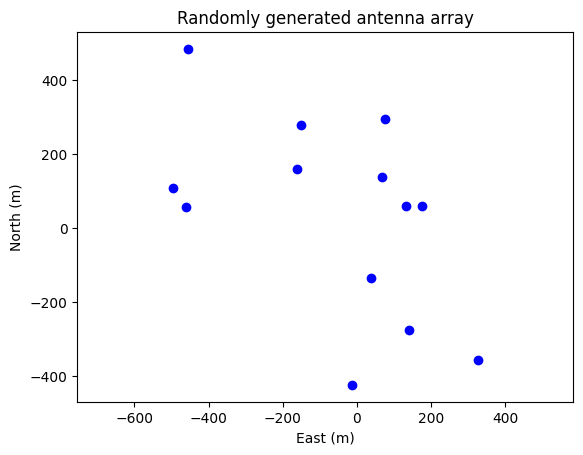

In [4]:
# Generate an array of 13 antennas located at random positions in a surface of 1 km by 1 km.
array = antenna_utils.random_antenna_arr(n_antenna=13, E_lim=1e3, N_lim=1e3)
# Import matplotlib for plotting
import matplotlib.pyplot as plt
plt.scatter(array[:, 0], array[:, 1], marker='o', color='blue')
plt.title("Randomly generated antenna array")
plt.xlabel("East (m)")
plt.ylabel("North (m)")
plt.axis('equal')
plt.show()

In [5]:
# Print the antenna positions
array

array([[  38.32214843, -133.27792361,    0.        ],
       [  67.0565208 ,  137.50549546,    0.        ],
       [ 325.3239571 , -355.26833126,    0.        ],
       [-162.5115777 ,  159.14855962,    0.        ],
       [-461.54840165,   56.19434699,    0.        ],
       [-455.76406117,  483.30276087,    0.        ],
       [  75.13271019,  294.38747194,    0.        ],
       [ 141.112833  , -273.8275666 ,    0.        ],
       [-149.95833282,  279.40609696,    0.        ],
       [ 131.38103898,   58.46196517,    0.        ],
       [ -12.7027687 , -422.98756447,    0.        ],
       [ 174.28517549,   59.17778454,    0.        ],
       [-496.78175409,  107.08551485,    0.        ]])

Now we will play around with the generated array using numpy.

In [6]:
# Import numpy and matplotlib
import numpy as np

Centre of the array: [-60.5117317  34.5622008   0.       ]


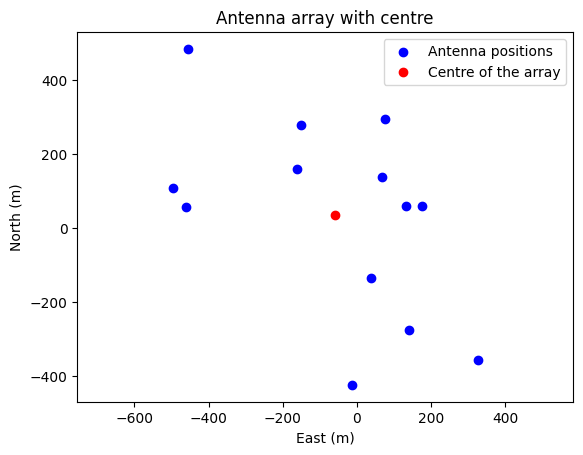

In [7]:
# Compute the centre of the array
array_centre = np.mean(array, axis=0)

# Print the centre of the array and plot it along with the antenna array
print("Centre of the array:", array_centre)
plt.scatter(array[:, 0], array[:, 1], marker='o', color='blue', label='Antenna positions')
# Watch out for the units: the array is in meters, we convert to kilometers for plotting
plt.plot(array_centre[0], array_centre[1], 'ro', label='Centre of the array')
plt.legend()
plt.title("Antenna array with centre")
plt.xlabel("East (m)")
plt.ylabel("North (m)")
plt.axis('equal')
plt.show()


In [8]:
# Define a function that computes the centre of an array
def compute_array_centre(array):
    """
    Compute the centre of an antenna array.
    
    Parameters:
    array (numpy.ndarray): An array of shape (n, 3) where n is the number of antennas.

    Returns:
    numpy.ndarray: The centre of the array as a 1D array with two elements (E, N).
    """
    return np.mean(array, axis=0)

In [9]:
def compute_max_baseline(array):
    separations = np.array([array[i]-array[j] for i in range(len(array)) for j in range(len(array))])
    separations = np.linalg.norm(separations, axis=1)
    max_separation = np.max(separations)
    max_separation_indices = np.unravel_index(np.argmax(separations), (len(array), len(array)))
    # add one to match antenna indices starting from 1
    max_separation_indices = (max_separation_indices[0] + 1, max_separation_indices[1] + 1)

    return max_separation, max_separation_indices

def compute_min_baseline(array):
    separations = np.array([array[i]-array[j] for i in range(len(array)) for j in range(len(array))])
    separations = np.linalg.norm(separations, axis=1)
    separations[separations == 0] = np.inf  # Avoid zero separation
    min_separation = np.min(separations)
    min_separation_indices = np.unravel_index(np.argmin(separations), (len(array), len(array)))
    # add one to match antenna indices starting from 1
    min_separation_indices = (min_separation_indices[0] + 1, min_separation_indices[1] + 1)

    return min_separation, min_separation_indices


In [10]:
# Compute the maximum separation between antennas.
separations = np.array([array[i]-array[j] for i in range(len(array)) for j in range(len(array))])
separations = np.linalg.norm(separations, axis=1)
max_separation = np.max(separations)
print("Maximum separation between antennas:", max_separation)

# Which antennas conform the maximum separation?
max_separation_indices = np.unravel_index(np.argmax(separations), (len(array), len(array)))
# add one to match antenna indices starting from 1
max_separation_indices = (max_separation_indices[0] + 1, max_separation_indices[1] + 1)
print("Antennas with maximum separation:", max_separation_indices)

Maximum separation between antennas: 1145.9930055777481
Antennas with maximum separation: (3, 6)


In [11]:
compute_max_baseline(array)

(1145.9930055777481, (3, 6))

In [12]:
# Compute the minimum separation between antennas.
separations[separations == 0] = np.inf  # Avoid zero separation
min_separation = np.min(separations)
print("Minimum separation between antennas:", min_separation)

# Which antennas conform the minimum separation?
min_separation_indices = np.unravel_index(np.argmin(separations), (len(array), len(array)))
# add one to match antenna indices starting from 1
min_separation_indices = (min_separation_indices[0] + 1, min_separation_indices[1] + 1)
print("Antennas with minimum separation:", min_separation_indices)


Minimum separation between antennas: 42.910107518956195
Antennas with minimum separation: (10, 12)


In [13]:
compute_min_baseline(array)

(42.910107518956195, (10, 12))

We will now display the antenna array in a 2D plot using `matplotlib`.

In [14]:
# Import pyplot from the matplotlib library (skip if already imported)


In [15]:
# Plot the antenna positions in 2D.
# - The plot should be square with equal scales on both axes.
# - The plot should have a title.
# - The plot should have labels for the x and y axes (propose a label that makes sense).
# - Display the array centre as a red cross.
# - Connect the furthest antennas with a green line.
# - Connect the closest antennas with a blue line.


# To do ...

### Antenna configurations

We will now generate some antenna configurations and plot them using the `plot_utils` module.

In [16]:
# import the plot_utils module and display help.
from argosim import plot_utils
help(plot_utils)


Help on module argosim.plot_utils in argosim:

NAME
    argosim.plot_utils - Plot utils.

DESCRIPTION
    This module contains functions to plot the antenna array, beam, baselines,
    uv-coverage and sky models.

    :Authors: Ezequiel Centofanti <ezequiel.centofanti@cea.fr>

FUNCTIONS
    plot_antenna_arr(array, ax=None, fig=None, title='Array', antenna_idx=True, s=20, c='mediumblue')
        Plot antenna array.

        Function to plot the antenna array in ground coordinates.

        Parameters
        ----------
        array : np.ndarray
            The antenna array positions in the ground.
        ax : matplotlib.axes.Axes
            The axis to plot the antenna array. For plotting on a specific subplot axis.
        fig : matplotlib.figure.Figure
            The figure to plot the antenna array. For plotting on a specific subplot axis.
        title : str
            The title of the plot.
        antenna_idx : bool
            If True, annotate the antenna indices on the pl

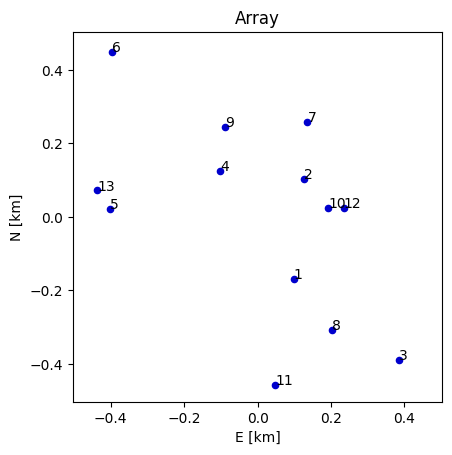

In [17]:
# Which function from the plot_utils module would you use to plot the antenna positions?

# Plot the previously created array.
plot_utils.plot_antenna_arr(array)



In [18]:
# Generate and plot the following antenna arrays:
# - 128 antennas located at random positions in a surface of 2 km by 2 km.
# - Y shaped array with 8 antennas per arm and an arm length of 620 m.
# - A circular array with 33 antennas and a radius of 8000 m.
# - (challenge) An uniformly spaced array with 32 antennas, having a minimum separation of 100 m and a maximum separation of 780 m.
# - (have fun) A Mercedes-Benz array. Hint: use the combine_antenna_arr function from the antenna_utils module.


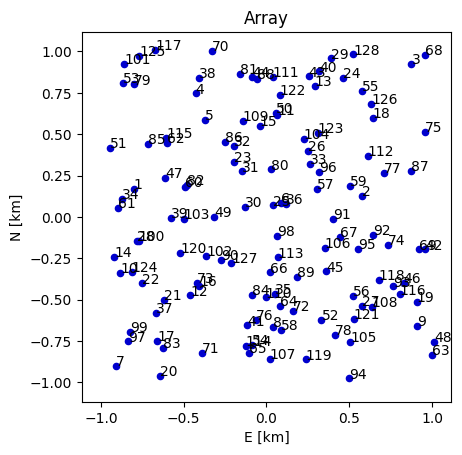

In [19]:
# - 128 antennas located at random positions in a surface of 2 km by 2 km.
antenna_1 = antenna_utils.random_antenna_arr(n_antenna=128, E_lim=2e3, N_lim=2e3)
plot_utils.plot_antenna_arr(antenna_1)

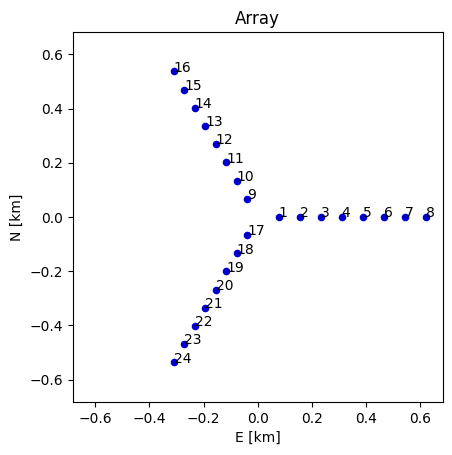

In [20]:
# - Y shaped array with 8 antennas per arm and an arm length of 620 m.
antenna_2 = antenna_utils.y_antenna_arr(n_antenna=8, r=620)
plot_utils.plot_antenna_arr(antenna_2)

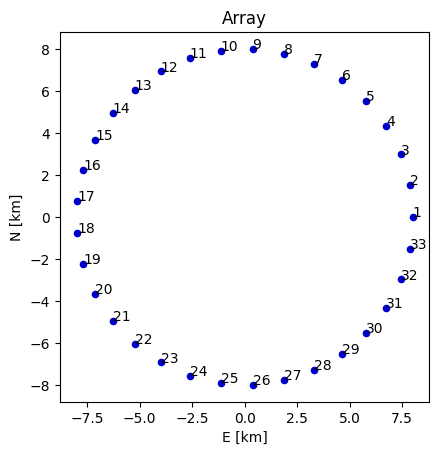

In [21]:
# - A circular array with 33 antennas and a radius of 8000 m.
antenna_3 = antenna_utils.circular_antenna_arr(n_antenna=33, r=8000)
plot_utils.plot_antenna_arr(antenna_3)

(780.0, (1, 32))
(100.0, (1, 9))


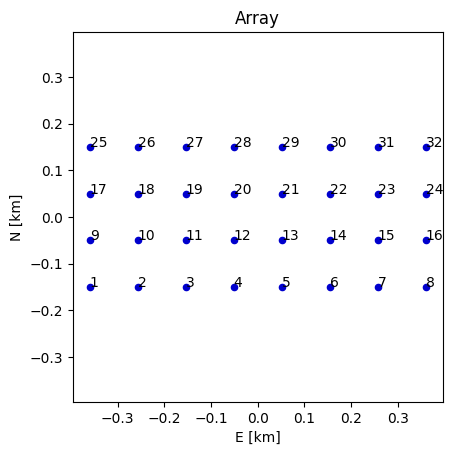

In [22]:
# - (challenge) An uniformly spaced array with 32 antennas, having a minimum separation of 100 m and a maximum separation of 780 m.
antenna_4 = antenna_utils.uni_antenna_array(n_antenna_E=8, n_antenna_N=4, E_lim=720, N_lim=300)
plot_utils.plot_antenna_arr(antenna_4)

# Check the maximum and minimum baseline of the antenna arrays.
print(compute_max_baseline(antenna_4))
print(compute_min_baseline(antenna_4))

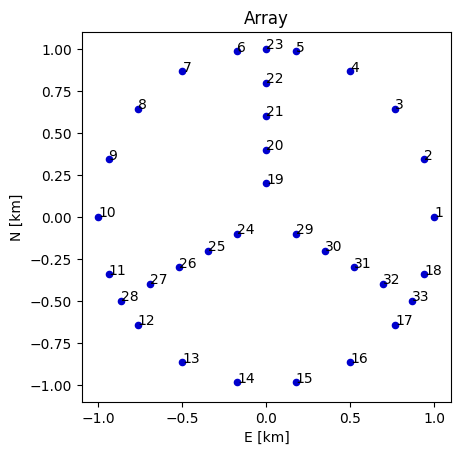

In [23]:
# - (have fun) A Mercedes-Benz array. Hint: use the combine_antenna_arr function from the antenna_utils module.
antenna_5_circ = antenna_utils.circular_antenna_arr(n_antenna=18, r=1000)
antenna_5_y = antenna_utils.y_antenna_arr(n_antenna=5, r=1000, alpha=90)
antenna_5 = antenna_utils.combine_antenna_arr(antenna_5_circ, antenna_5_y)
plot_utils.plot_antenna_arr(antenna_5)

### Load and save antenna configurations

Load the `argos_pathfinder.enu.txt` file, located in `data/array_configs/`. The file can also be found at the [GitHub repository](https://github.com/ARGOS-telescope/argosim/tree/main/configs/arrays).

In [26]:
# What does this file contain?
data = np.loadtxt('../data/array_configs/argos_pathfinder.enu.txt')
# Display the data
print(data)


[[  1.  15.  10.   0.]
 [  2.  17.  35.   0.]
 [  3.   7.  50.   0.]
 [  4.  17.  75.   0.]
 [  5.  10. 183.   0.]]


In [27]:
# Use the function load_antenna_enu_txt from the ant_utils module.
array = antenna_utils.load_antenna_enu_txt('../data/array_configs/argos_pathfinder.enu.txt')
array

array([[ 15.,  10.,   0.],
       [ 17.,  35.,   0.],
       [  7.,  50.,   0.],
       [ 17.,  75.,   0.],
       [ 10., 183.,   0.]])

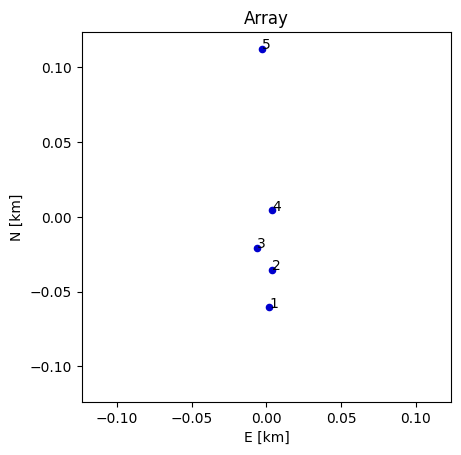

In [28]:
# Plot the array
plot_utils.plot_antenna_arr(array)


In [29]:
# Propose a function to save an array to a txt file in the same format as the one loaded by load_antenna_enu_txt.
# ...

In [72]:
# Save the Mercedez Benz array to a txt file.
# ...

### Baselines
Explain what a baseline is in the context of radio interferometry.

...

In [73]:
# Using the function get_baselines, compute the baselines of a Y shaped array 
# with 3 antennas per arm and an arm length of 2 km.
y_array = antenna_utils.y_antenna_arr(n_antenna=3, r=2000)
baselines = antenna_utils.get_baselines(y_array)
print("Baselines of the Y shaped array:")
print(baselines)


Baselines of the Y shaped array:
[[ -666.6667      0.          0.     ]
 [-1333.3333      0.          0.     ]
 [ 1000.       -577.3503      0.     ]
 [ 1333.3334  -1154.7006      0.     ]
 [ 1666.6667  -1732.0508      0.     ]
 [ 1000.        577.3503      0.     ]
 [ 1333.3334   1154.7006      0.     ]
 [ 1666.6667   1732.0508      0.     ]
 [  666.6667      0.          0.     ]
 [ -666.6666      0.          0.     ]
 [ 1666.6667   -577.3503      0.     ]
 [ 2000.      -1154.7006      0.     ]
 [ 2333.3335  -1732.0508      0.     ]
 [ 1666.6667    577.3503      0.     ]
 [ 2000.       1154.7006      0.     ]
 [ 2333.3335   1732.0508      0.     ]
 [ 1333.3333      0.          0.     ]
 [  666.6666      0.          0.     ]
 [ 2333.3333   -577.3503      0.     ]
 [ 2666.6667  -1154.7006      0.     ]
 [ 3000.      -1732.0508      0.     ]
 [ 2333.3333    577.3503      0.     ]
 [ 2666.6667   1154.7006      0.     ]
 [ 3000.       1732.0508      0.     ]
 [-1000.        577.3503      0

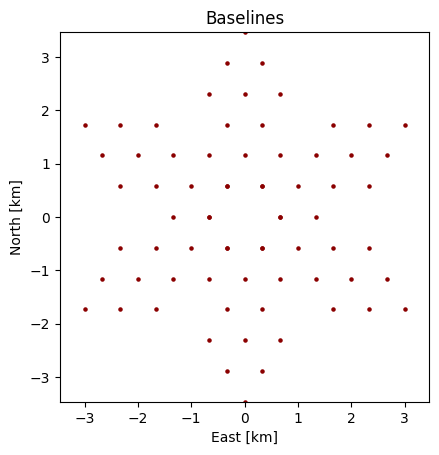

In [74]:
# Using the plot_baselines function from the plot_utils module, 
# plot the baselines of the Y shaped array setting the ENU option to True.
plot_utils.plot_baselines(baselines, ENU=True)


What does the option `ENU=True` do in the `plot_baselines` function? We will use the option `ENU=False` in future tutorials.

...

What does each point in the plot represent?

...

What do the x and y axes represent?

...

In [ ]:
# How many baselines are there in total?
# ...


How many points do you count on the baselines plot? What happened with the missing points?

...